In [5]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import time
import networkx as nx
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [6]:
url = lambda x: f'http://quotes.toscrape.com/page/{x}/'

# Câu 3.1.1

Dùng requests cào link của từng tác giả và số trang mà link đó đang ở

In [7]:
all_author_link = []
for page in range(1, 11):
    soup = BeautifulSoup(requests.get(url(page)).text, 'html.parser')
    author_link = [('http://quotes.toscrape.com' + i['href'], page, idx) for idx, i in enumerate(soup.select('span > a')[:10])]
    all_author_link += author_link
# Thêm all_author_link vào file kq.txt
with open('kq.txt', 'w') as f:
    for i in all_author_link:
        f.write(str(i))
        f.write('\n')

## _Mô tả cấu trúc_  
Trang web http://quotes.toscrape.com/ có cấu trúc bao gồm các phần tử HTML như tiêu đề, đoạn văn bản, hình ảnh, đường link chứa nhiều trích dẫn nổi tiếng của các tác giả khác nhau. Mỗi trích dẫn bao gồm một đoạn văn bản được đặt trong thẻ <span class="text".> và tác giả của trích dẫn được đặt trong thẻ <small class="author".>. Ngoài ra, mỗi trích dẫn cũng chứa một danh sách các thẻ "<a.>" đại diện cho các từ khóa được liệt kê trong mục "Tags". Trang web cũng cung cấp các liên kết đến trang tác giả và trang theo dõi các từ khóa. Các trích dẫn được trình bày trên một nền tảng đơn giản và dễ đọc, với phần bố cục rõ ràng.năng tương tác và động cho trang web.

# Câu 3.1.2

In [8]:
# 3.1.2a. Lấy thẻ div với class là quote
result = []
for author in all_author_link:
    soup = BeautifulSoup(requests.get(url(author[1])).text, 'html.parser')
    result += soup.select('div.quote')
print(result)

[<div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”</span>
<span>by <small class="author" itemprop="author">Albert Einstein</small>
<a href="/author/Albert-Einstein">(about)</a>
</span>
<div class="tags">
            Tags:
            <meta class="keywords" content="change,deep-thoughts,thinking,world" itemprop="keywords"/>
<a class="tag" href="/tag/change/page/1/">change</a>
<a class="tag" href="/tag/deep-thoughts/page/1/">deep-thoughts</a>
<a class="tag" href="/tag/thinking/page/1/">thinking</a>
<a class="tag" href="/tag/world/page/1/">world</a>
</div>
</div>, <div class="quote" itemscope="" itemtype="http://schema.org/CreativeWork">
<span class="text" itemprop="text">“It is our choices, Harry, that show what we truly are, far more than our abilities.”</span>
<span>by <small class="author" itemprop="author">J.K.

In [9]:
#3.1.2b Tìm trong result các thẻ small với class là author
a = []
for r in result:
    a += r.select('small.author')
print(a)

[<small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">André Gide</small>, <small class="author" itemprop="author">Thomas A. Edison</small>, <small class="author" itemprop="author">Eleanor Roosevelt</small>, <small class="author" itemprop="author">Steve Martin</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">J.K. Rowling</small>, <small class="author" itemprop="author">Albert Einstein</small>, <small class="author" itemprop="author">Jane Austen</small>, <small class="author" itemprop="author">Marilyn Monroe</small>, <small class="author" itemprop="author">Alber

In [10]:
def tacgiaLink(author):
    author_url, page_idx, author_idx = author
    soup = BeautifulSoup(requests.get(url(page_idx)).text, 'html.parser')
    author_name = soup.select('small.author')[author_idx].text
    author_quote = re.sub('[""]', '', soup.select('span.text')[author_idx].text)
    soup2 = BeautifulSoup(requests.get(author_url).text, 'html.parser')
    born = soup2.select_one('span.author-born-date').text
    author_born = pd.to_datetime(born)
    return {
        'Tacgia': [author_name],
        'Link': [author_url],
        'Namsinh': [author_born],
        'Quote': [author_quote]
    }

### 3.1.2d Lưu kết quả vào Quote.csv

In [11]:
df = pd.DataFrame(columns=['Tacgia', 'Link', 'Namsinh', 'Quote'])
df

,Tacgia,Link,Namsinh,Quote


In [12]:
url = lambda x: f'http://quotes.toscrape.com/page/{x}/'

In [13]:
for author in all_author_link:
    tac_gia_content = tacgiaLink(author)
    print(tac_gia_content)
    df = pd.concat([df, pd.DataFrame(tac_gia_content)])

{'Tacgia': ['Albert Einstein'], 'Link': ['http://quotes.toscrape.com/author/Albert-Einstein'], 'Namsinh': [Timestamp('1879-03-14 00:00:00')], 'Quote': ['“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”']}
{'Tacgia': ['J.K. Rowling'], 'Link': ['http://quotes.toscrape.com/author/J-K-Rowling'], 'Namsinh': [Timestamp('1965-07-31 00:00:00')], 'Quote': ['“It is our choices, Harry, that show what we truly are, far more than our abilities.”']}
{'Tacgia': ['Albert Einstein'], 'Link': ['http://quotes.toscrape.com/author/Albert-Einstein'], 'Namsinh': [Timestamp('1879-03-14 00:00:00')], 'Quote': ['“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”']}
{'Tacgia': ['Jane Austen'], 'Link': ['http://quotes.toscrape.com/author/Jane-Austen'], 'Namsinh': [Timestamp('1775-12-16 00:00:00')], 'Quote': ['“The person, be it gentleman or lady, who has not pleasure i

In [14]:
df

,Tacgia,Link,Namsinh,Quote
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...
0,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...
0,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
0,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."
...,...,...,...,...
0,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...
0,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...
0,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”"


In [15]:
df.to_csv('Quote.csv')

# Câu 3.2
## 3.2.1
- Bạn hãy thêm vào Trường STT và điền tự động dữ liệu của trường này?

In [16]:
import csv

# Đọc dữ liệu từ file CSV vào một list
with open('Quote.csv', 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = [row for row in csv_reader if row]

# Ghi list mới (không chứa các dòng rỗng) vào file CSV
with open('Quote.csv', 'w', encoding= "utf-8", newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerows(data)


In [17]:
# Đọc file CSV
with open('Quote.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f)
    data = list(reader)

# Thêm trường STT vào header
data[0].insert(0, 'STT')

# Điền tự động dữ liệu cho trường STT
for i in range(1, len(data)):
    data[i].insert(0, i)

# Ghi file CSV đã có trường STT   
with open('Quote.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows(data)

- Một số giá trị của dữ liệu Trường ngày sinh chưa có, bạn hãy đề xuất cách điền?

--> Xử lý trường ngày sinh :
Do dữ liệu chúng em cào về nên Trường ngày tháng năm sinh không bị thiếu. Nhưng để đề xuất cách điền cho trường Ngày tháng năm sinh thì nhóm em sẽ cào ngày sinh của các tác giả trên qua một trang thông tin khác ví dụ như wiki để lấy dữ liệu ngày tháng năm sinh. 

- Bạn hãy thêm vào Trường Tuoi (Tuổi) và đề xuất cách điền tuổi của các tác giả? 

Trang web dùng để cào không có thông tin về ngày mất của tác giả nên chúng ta không thể lấy dữ liệu từ đó để tính tuổi. Số lượng dữ liệu có hạn nên em sẽ đề xuất cách điền tuổi thủ công bằng tay. Tuổi của tác giả được tính bằng cách lấy năm hiện tại trừ đi năm sinh, trường hợp tác giả đã mất, ta sẽ lấy năm mất trừ đi năm sinh.  
    --> Tuy nhiên nếu có thể sử dụng dữ liệu từ các nguồn khác, chúng em có đề xuất dùng trang web https://www.famousbirthdays.com/ hoặc https://vi.wikipedia.org/wiki/ để Truy cập vào search_box của 1 trong 2 trang. Sau đó truyền giá trị tên của tác giả trong 1 file author.txt đã lưu từ trước. Từ đó ta sẽ lấy được dữ liệu năm mất(nếu có) của tác giả hoặc thậm chí là cả Tuổi của tác giả.

In [18]:
Tuoilist = [76, 55, 41, 36, 81, 84, 78, 75, 36, 87, 49,
            87, 56, 74, 86, 69, 78, 87, 78, 53, 78, 85,
            87, 61, 72, 64, 39, 63, 72, 71, 47, 61, 87, 
            94, 73, 58, 81, 83, 66, 91, 71, 40, 66, 77, 
            27, 77, 68, 56, 89, 88]

In [19]:
df.Tacgia.unique().tolist()
Tuoidict = {}
for i, j in zip(df.Tacgia.unique().tolist(), Tuoilist):
        Tuoidict[i] = j 
Tuoidict

{'Albert Einstein': 76,
 'J.K. Rowling': 55,
 'Jane Austen': 41,
 'Marilyn Monroe': 36,
 'André Gide': 81,
 'Thomas A. Edison': 84,
 'Eleanor Roosevelt': 78,
 'Steve Martin': 75,
 'Bob Marley': 36,
 'Dr. Seuss': 87,
 'Douglas Adams': 49,
 'Elie Wiesel': 87,
 'Friedrich Nietzsche': 56,
 'Mark Twain': 74,
 'Allen Saunders': 86,
 'Pablo Neruda': 69,
 'Ralph Waldo Emerson': 78,
 'Mother Teresa': 87,
 'Garrison Keillor': 78,
 'Jim Henson': 53,
 'Charles M. Schulz': 78,
 'William Nicholson': 85,
 'Jorge Luis Borges': 87,
 'George Eliot': 61,
 'George R.R. Martin': 72,
 'C.S. Lewis': 64,
 'Martin Luther King Jr.': 39,
 'James Baldwin': 63,
 'Haruki Murakami': 72,
 'Alexandre Dumas fils': 71,
 'Stephenie Meyer': 47,
 'Ernest Hemingway': 61,
 'Helen Keller': 87,
 'George Bernard Shaw': 94,
 'Charles Bukowski': 73,
 'Suzanne Collins': 58,
 'J.R.R. Tolkien': 81,
 'Alfred Tennyson': 83,
 'Terry Pratchett': 66,
 'J.D. Salinger': 91,
 'George Carlin': 71,
 'John Lennon': 40,
 'W.C. Fields': 66,
 'Ay

In [20]:
df['Tuổi'] = df['Tacgia'].map(Tuoidict)

In [21]:
df

,Tacgia,Link,Namsinh,Quote,Tuổi
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...,76
0,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t...",55
0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...,76
0,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ...",41
0,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and...",36
...,...,...,...,...,...
0,Harper Lee,http://quotes.toscrape.com/author/Harper-Lee,1926-04-28,“You never really understand a person until yo...,89
0,Madeleine L'Engle,http://quotes.toscrape.com/author/Madeleine-LE...,1918-11-29,“You have to write the book that wants to be w...,88
0,Mark Twain,http://quotes.toscrape.com/author/Mark-Twain,1835-11-30,“Never tell the truth to people who are not wo...,74
0,Dr. Seuss,http://quotes.toscrape.com/author/Dr-Seuss,1904-03-02,"“A person's a person, no matter how small.”",87


## 3.2.2 Khám phá dữ liệu

In [54]:
df = pd.read_csv('Quote.csv', index_col=0, parse_dates=['Namsinh'])
df.head()

,STT,Tacgia,Link,Namsinh,Quote
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."


* Thông tin bộ dữ liệu

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 1  100 non-null    int64         
 1   Tacgia      100 non-null    object        
 2   Link        100 non-null    object        
 3   Namsinh     100 non-null    datetime64[ns]
 4   Quote       100 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 4.7+ KB


* Kích cỡ của bộ dữ liệu

In [24]:
print(f'Kích cỡ của dữ liệu: {df.shape}')

Kích cỡ của dữ liệu: (100, 5)


In [25]:
df.describe()

,Unnamed: 1
count,100.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


* Thống kê về năm sinh của các tác giả 

In [26]:
# Thống kê năm sinh của các tác giả
e = df.groupby(df['Namsinh']).count().reset_index()
match = re.findall(r'\d{4}', str(e['Namsinh']))
if match:
    print("Thống kê năm sinh của các tác giả: \n", match)
f = pd.DataFrame(match)
print(f.describe(), f.mean(), f.median(), f.mode(), f.var(), f.std(), f.skew(), f.kurt(), sep='\n')


Thống kê năm sinh của các tác giả: 
 ['1775', '1803', '1809', '1819', '1824', '1835', '1844', '1847', '1856', '1860', '1869', '1879', '1880', '1880', '1884', '1892', '1894', '1898', '1899', '1899', '1899', '1904', '1904', '1905', '1910', '1918', '1919', '1920', '1922', '1924', '1926', '1926', '1928', '1929', '1936', '1937', '1940', '1942', '1942', '1945', '1945', '1948', '1948', '1948', '1949', '1952', '1962', '1965', '1965', '1973']
           0
count     50
unique    40
top     1899
freq       3
0    3.550361e+197
dtype: float64
0    1914.0
dtype: float64
      0
0  1899
1  1948
Series([], dtype: float64)
Series([], dtype: float64)
0   -0.854258
dtype: float64
0    0.14392
dtype: float64


C:\Users\cupho\AppData\Local\Temp\ipykernel_4316\3138361427.py:7: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f.describe(), f.mean(), f.median(), f.mode(), f.var(), f.std(), f.skew(), f.kurt(), sep='\n')
C:\Users\cupho\AppData\Local\Temp\ipykernel_4316\3138361427.py:7: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(f.describe(), f.mean(), f.median(), f.mode(), f.var(), f.std(), f.skew(), f.kurt(), sep='\n')


* Thống kê mô tả về các câu nói nổi tiếng như: số lượng câu nói, trung bình số từ mỗi câu, độ lệch chuẩn, số từ nhỏ nhất, số từ lớn nhất, số từ ở vị trí thứ 25%, 50%, và 75% … 

In [27]:
# Thống kê về các câu nói nổi tiếng như: câu dài nhất, ngắn nhất, số từ, …
g = df['Quote'].str.split().str.len()
print("Thống kê mô tả về các câu nói nổi tiếng : \n", g.describe())

Thống kê mô tả về các câu nói nổi tiếng : 
 count    100.000000
mean      23.630000
std       25.189245
min        7.000000
25%       12.000000
50%       17.000000
75%       25.000000
max      201.000000
Name: Quote, dtype: float64


* Thống kê về số lượng các từ được sử dụng trong các câu nói nổi tiếng 

In [28]:
# Thống kê về các từ được sử dụng trong các câu nói
h = df['Quote'].str.split(expand=True).stack().value_counts()
print("Thống kê về các từ được sử dụng trong các câu nói: \n", h)

Thống kê về các từ được sử dụng trong các câu nói: 
 you          76
to           69
is           67
a            60
the          55
             ..
course        1
happening     1
head,         1
why           1
edge.”        1
Length: 904, dtype: int64


# Vẽ biểu đồ để biểu diễn các thống kê

* Biểu đồ cột thống kê số lượng câu nói của các tác giả

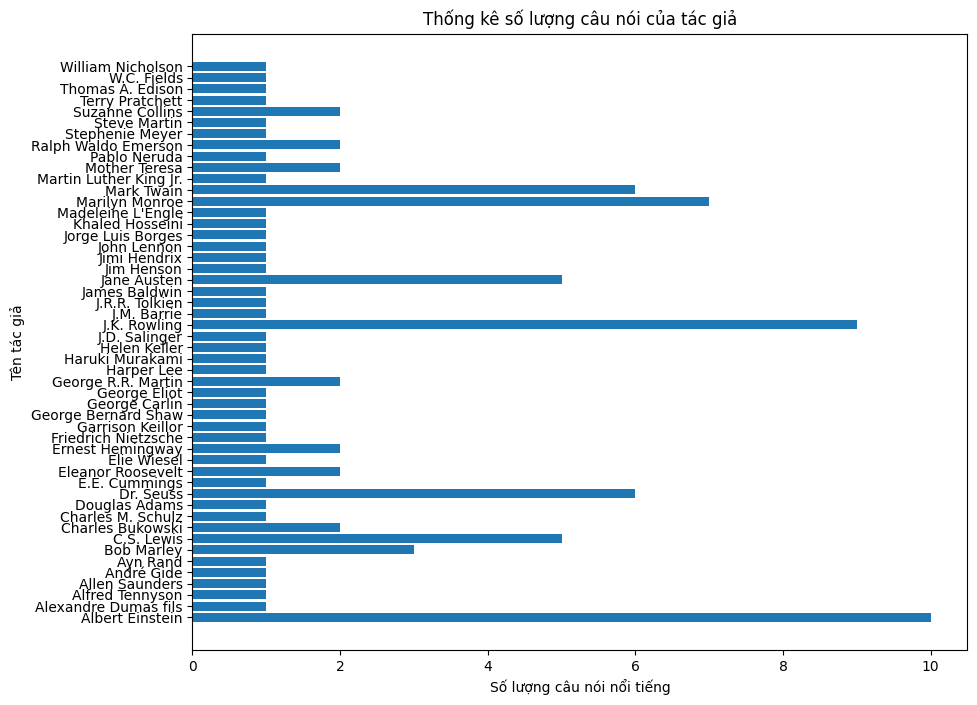

In [29]:
# Phân tích, trực quan mối quan hệ giữa giữa tác giả và câu nói nổi tiếng
# Đọc dữ liệu từ file CSV vào DataFrame
df = pd.read_csv('Quote.csv')
fig, ax = plt.subplots(figsize=(10,8))

# Tính toán số lượng câu nói nổi tiếng của mỗi tác giả
author_quotes = df.groupby('Tacgia')['Quote'].count().reset_index()

# Thiết lập khoảng cách giữa các trục theo chiều dọc
plt.subplots_adjust(hspace=0.25)

ax.barh(author_quotes['Tacgia'], author_quotes['Quote'])
plt.title("Thống kê số lượng câu nói của tác giả")
plt.xlabel('Số lượng câu nói nổi tiếng')
plt.ylabel('Tên tác giả')
plt.show()

* Top 10 từ xuất hiện nhiều nhất trong các câu nói nổi tiếng

*  Top 10 người có nhiều câu nói nhất

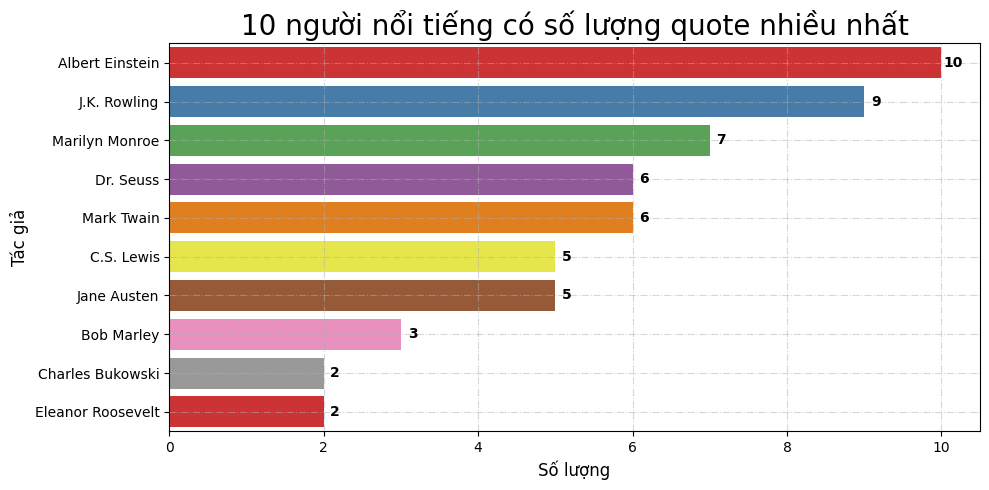

In [30]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=pd.DataFrame(df.groupby('Tacgia').count()['Quote'].nlargest(10)).reset_index(), y='Tacgia', x='Quote', palette='Set1')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 0.15, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('10 người nổi tiếng có số lượng quote nhiều nhất', fontsize=20)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
f.tight_layout()
plt.show()


In [31]:
# Đếm số từ trong câu nói nổi tiếng
df['Số từ'] = df['Quote'].str.split().str.len()
# Đếm số chữ cái trong câu nói nổi tiếng
df['Số chữ cái'] = df['Quote'].str.len()

# * Top 10 người nổi tiếng có câu quote ngắn nhất

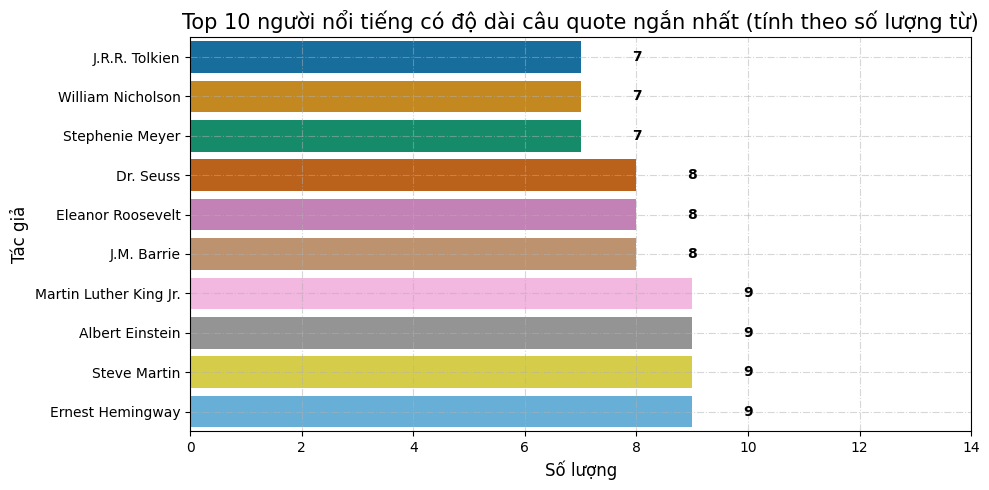

In [32]:
f, ax = plt.subplots(figsize=(10, 5))
colors = sns.color_palette('colorblind', 10)
g = sns.barplot(data=df.sort_values(by=['Số từ']).reset_index().loc[:9], x='Số từ', y='Tacgia', palette=colors)

# g = sns.barplot(data=df.sort_values(by=['Số từ']).reset_index().loc[:9], x='Số từ', y='Tacgia', color='blue')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 1, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('Top 10 người nổi tiếng có độ dài câu quote ngắn nhất (tính theo số lượng từ)', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 14)
f.tight_layout()
plt.show()

## Top 10 tác giả có câu nói dài nhất

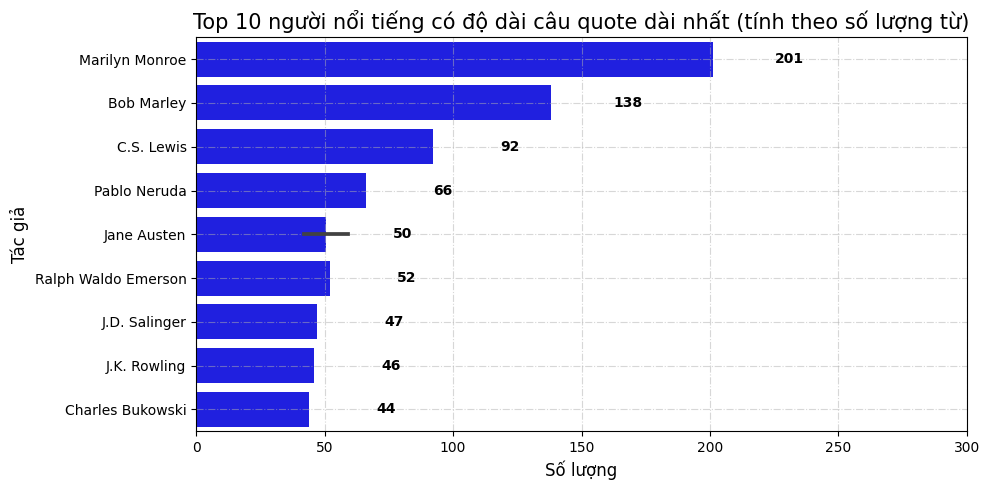

In [33]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['Số từ'], ascending=False).reset_index().loc[:9], x='Số từ', y='Tacgia', color='blue')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 30, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('Top 10 người nổi tiếng có độ dài câu quote dài nhất (tính theo số lượng từ)', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 300)
f.tight_layout()
plt.show()

## Top 10 tác giả có số chữ cái nhiều nhất

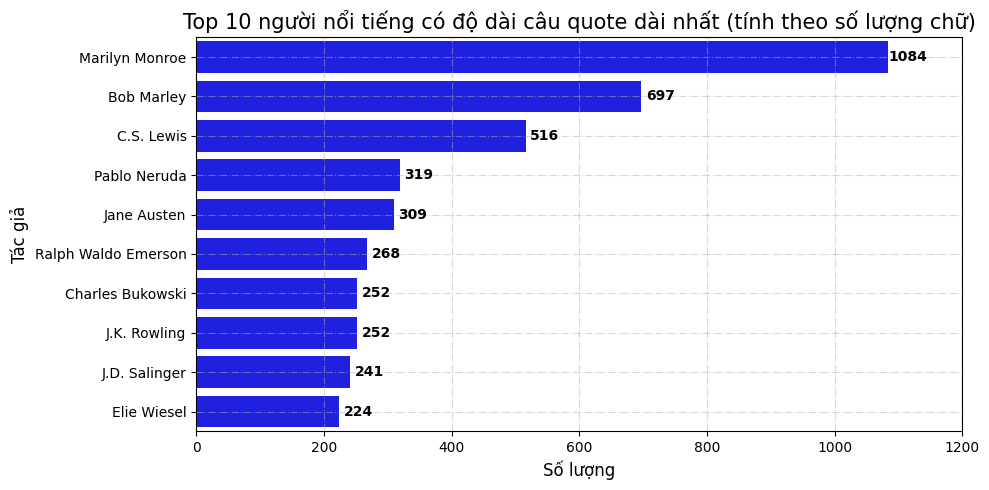

In [34]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['Số chữ cái'], ascending=False).reset_index().loc[:9], x='Số chữ cái', y='Tacgia', color='blue')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 30, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('Top 10 người nổi tiếng có độ dài câu quote dài nhất (tính theo số lượng chữ)', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 1200)
f.tight_layout()
plt.show()

## Top 10 tác giả có số chữ cái ít nhất

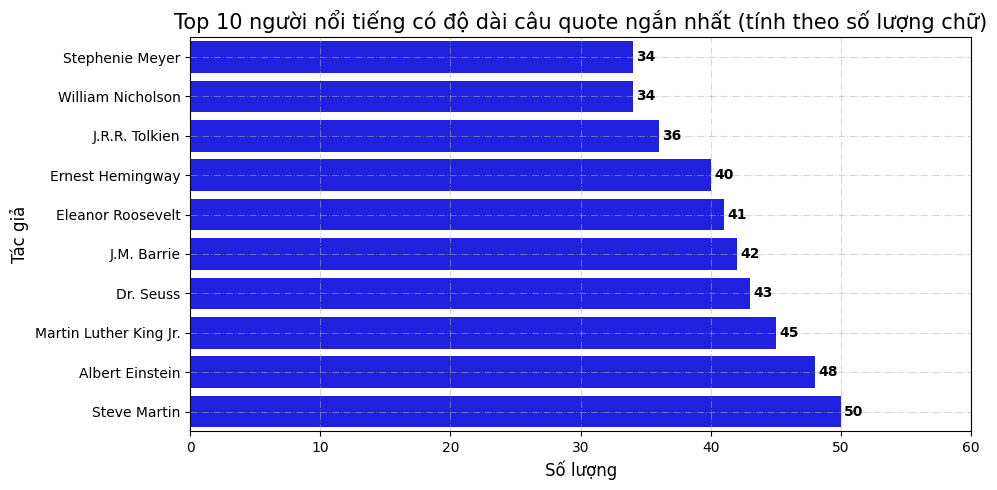

In [35]:
f, ax = plt.subplots(figsize=(10, 5))
g = sns.barplot(data=df.sort_values(by=['Số chữ cái']).reset_index().loc[:9], x='Số chữ cái', y='Tacgia', color='blue')
for p in g.patches:
    ax.annotate(
        format(p.get_width(), '.0f'),
        (p.get_width() + 1, p.get_y() + 0.5 * p.get_height()),
        ha='center', va='center', weight='bold'
    )
ax.grid(True, alpha=0.5, ls='-.')
ax.set_title('Top 10 người nổi tiếng có độ dài câu quote ngắn nhất (tính theo số lượng chữ)', fontsize=15)
ax.set_xlabel('Số lượng', fontsize=12)
ax.set_ylabel('Tác giả', fontsize=12)
ax.set_xlim(0, 60)
f.tight_layout()
plt.show()

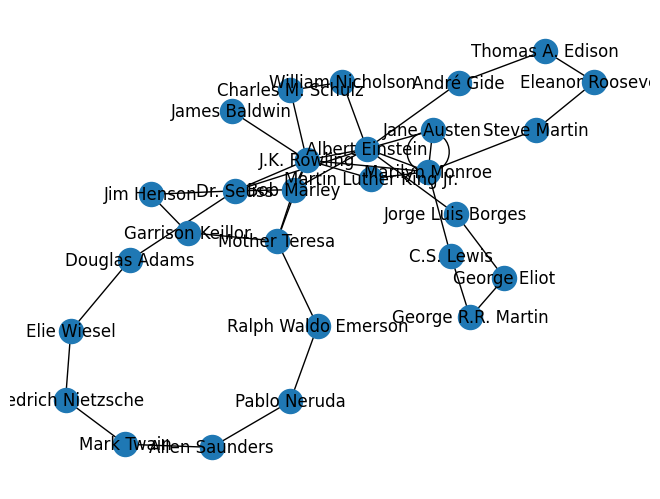

In [36]:
# Phân tích, trực quan mối quan hệ giữa các tác giả với nhau
# Tạo đồ thị
G = nx.Graph()

# Thêm các nút (tác giả)
for i in range(0, 50):
    G.add_node(df["Tacgia"][i].format(i))

# Thêm các cạnh (mối quan hệ giữa các tác giả)
for i in range(0, 49):
    G.add_edge(df["Tacgia"][i].format(i), df["Tacgia"][i+1].format(i+1))

# Vẽ biểu đồ mạng
nx.draw(G, with_labels=True)

# Hiển thị biểu đồ
plt.show()

## 3.2.3 Trích xuất đặc trưng-Feature Extraction
Trang web https://quotes.toscrape.com/ là một trang web chứa các trích dẫn nổi tiếng của các tác giả khác nhau. Để trích xuất đặc trưng từ bộ dữ liệu này, có thể sử dụng các phương pháp sau:

- Trích xuất đặc trưng từ văn bản: Đối với trang web này, có thể sử dụng các phương pháp trích xuất đặc trưng từ văn bản như TF-IDF (Term Frequency-Inverse Document Frequency) và Word2Vec để trích xuất đặc trưng. TF-IDF tính toán tần suất xuất hiện của các từ trong văn bản và đánh giá mức độ quan trọng của từ đó trong văn bản, trong khi Word2Vec trích xuất các đặc trưng từ các từ dựa trên mối quan hệ giữa các từ trong văn bản.

- Trích xuất đặc trưng từ tác giả: Đối với trang web này, có thể sử dụng tên tác giả để trích xuất đặc trưng. Các đặc trưng này có thể được sử dụng để phân loại các trích dẫn theo tác giả hoặc để dự đoán tác giả của một trích dẫn mới.

Lý do sử dụng các phương pháp trích xuất đặc trưng là để giảm chiều dữ liệu và tạo ra các đặc trưng có ý nghĩa để huấn luyện các mô hình học máy. Các đặc trưng này có thể được sử dụng để phân loại, dự đoán hoặc phân tích dữ liệu. Các phương pháp trích xuất đặc trưng từ văn bản và tác giả được sử dụng phổ biến trong các lĩnh vực như xử lý ngôn ngữ tự nhiên và phân tích dữ liệu văn bản.  
Trong trường hợp của trang web https://quotes.toscrape.com/, việc trích xuất đặc trưng từ văn bản có thể giúp xác định các từ và cụm từ quan trọng trong các trích dẫn và tạo ra các vectơ đặc trưng dựa trên các từ đó. Điều này có thể giúp phân loại các trích dẫn theo chủ đề hoặc tác giả. Ngoài ra, việc trích xuất đặc trưng từ tác giả có thể giúp xác định các đặc trưng riêng biệt của từng tác giả, ví dụ như phong cách viết và chủ đề ưa thích. Các đặc trưng này có thể được sử dụng để dự đoán tác giả của một trích dẫn mới hoặc phân tích mối quan hệ giữa các tác giả.

In [37]:
df = pd.read_csv('Quote.csv', index_col=0, parse_dates=['Namsinh'])
df.head()

,Unnamed: 1,Tacgia,Link,Namsinh,Quote
STT,,,,,
1,0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...
2,0,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
3,0,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...
4,0,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
5,0,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."


In [38]:
# Đếm số từ trong câu nói nổi tiếng
df['Số từ'] = df['Quote'].str.split().str.len()
# Đếm số chữ cái trong câu nói nổi tiếng
df['Số chữ cái'] = df['Quote'].str.len()

In [39]:
df['Year'] = df['Namsinh'].apply(lambda x: x.year)
df['Day'] = df['Namsinh'].apply(lambda x: x.day)
df['Month'] = df['Namsinh'].apply(lambda x: x.month)

In [40]:
encoder = LabelEncoder()
df['Tacgia'] = encoder.fit_transform(df.Tacgia)

In [41]:
df['Tacgia'].values

array([ 0, 26,  0, 30, 37,  0,  4, 47, 13, 44, 37, 26,  0,  6, 11, 10, 14,
       16, 38,  3, 41, 42, 40, 17, 31, 11,  0, 26,  0,  6, 11, 26,  6, 40,
       26,  9, 49,  0, 34, 20, 21,  7, 37, 37,  0, 37, 37, 39, 26, 29, 30,
       13, 37,  0, 23,  1, 43, 15, 24, 18,  8, 45, 45,  7, 28, 26, 15, 42,
       38, 11,  2,  8, 46, 11, 25, 19, 33, 48,  5, 38,  0, 30, 26, 30, 30,
        7,  7, 38, 38,  7, 26, 32, 27, 12, 35, 22, 36, 38, 11, 21])

In [42]:
encoder.classes_

array(['Albert Einstein', 'Alexandre Dumas fils', 'Alfred Tennyson',
       'Allen Saunders', 'André Gide', 'Ayn Rand', 'Bob Marley',
       'C.S. Lewis', 'Charles Bukowski', 'Charles M. Schulz',
       'Douglas Adams', 'Dr. Seuss', 'E.E. Cummings', 'Eleanor Roosevelt',
       'Elie Wiesel', 'Ernest Hemingway', 'Friedrich Nietzsche',
       'Garrison Keillor', 'George Bernard Shaw', 'George Carlin',
       'George Eliot', 'George R.R. Martin', 'Harper Lee',
       'Haruki Murakami', 'Helen Keller', 'J.D. Salinger', 'J.K. Rowling',
       'J.M. Barrie', 'J.R.R. Tolkien', 'James Baldwin', 'Jane Austen',
       'Jim Henson', 'Jimi Hendrix', 'John Lennon', 'Jorge Luis Borges',
       'Khaled Hosseini', "Madeleine L'Engle", 'Marilyn Monroe',
       'Mark Twain', 'Martin Luther King Jr.', 'Mother Teresa',
       'Pablo Neruda', 'Ralph Waldo Emerson', 'Stephenie Meyer',
       'Steve Martin', 'Suzanne Collins', 'Terry Pratchett',
       'Thomas A. Edison', 'W.C. Fields', 'William Nicholson'],

C:\Users\cupho\AppData\Local\Temp\ipykernel_4316\1056936683.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1,cmap='Blues')


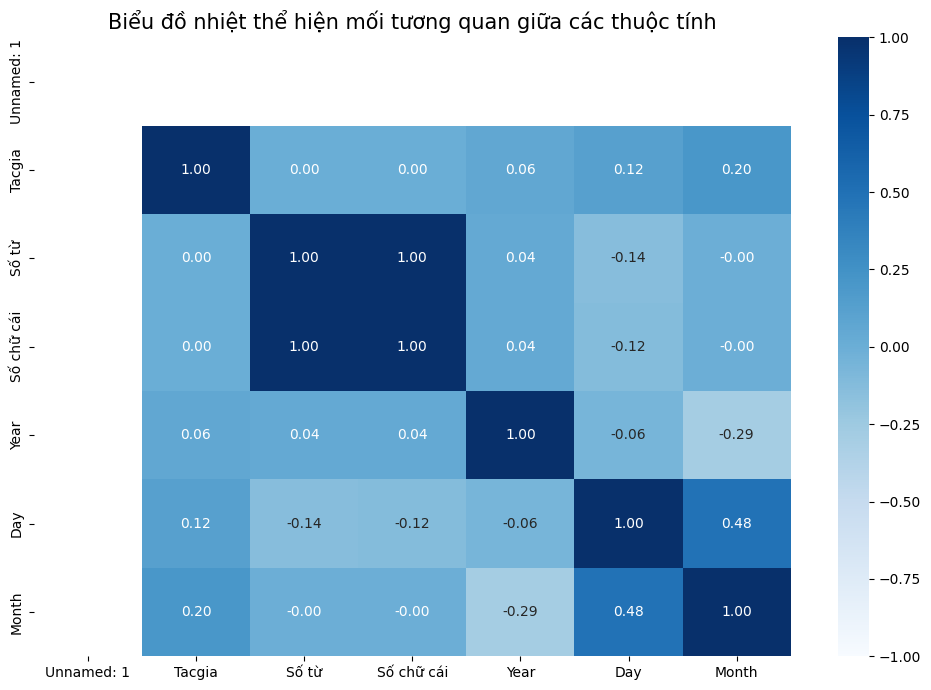

In [43]:
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1,cmap='Blues')
ax.set_title('Biểu đồ nhiệt thể hiện mối tương quan giữa các thuộc tính', fontsize=15)
f.tight_layout()
plt.show()

## Nhận xét:  
Theo ta quan sát thì "Số chữ cái" và "Số từ" có mỗi tương quan mật thiết và tỉ lệ thuận với nhau

## 3.2.4 Suy luận

- Hãy dự đoán tên của người nổi tiếng theo câu nói dựa trên các đặc trưng bạn trích
xuất ở trên và đánh giá trên bộ dữ liệu đã cho với tỉ lệ Train/Test và các độ đo phù
hợp?

In [44]:
# # Chuẩn bị dữ liệu
# import pandas as pd
# data = pd.read_csv('Quote.csv') # đọc dữ liệu từ file csv
# X = data['Quote'] # câu nói
# y = data['Tacgia'] # tên của người nổi tiếng

# # Tách dữ liệu
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Trích xuất đặc trưng
# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer()
# X_train_features = vectorizer.fit_transform(X_train)
# X_test_features = vectorizer.transform(X_test)

# # Huấn luyện mô hình
# from sklearn.svm import SVC
# svm_model = SVC(kernel='linear', C=1, probability=True)
# svm_model.fit(X_train_features, y_train)

# # Đánh giá mô hình
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# y_pred_train = svm_model.predict(X_train_features)
# y_pred_test = svm_model.predict(X_test_features)
# print('Accuracy (Train):', accuracy_score(y_train, y_pred_train))
# print('Accuracy (Test):', accuracy_score(y_test, y_pred_test))
# print('Precision:', precision_score(y_test, y_pred_test, average='weighted'))
# print('Recall:', recall_score(y_test, y_pred_test, average='weighted'))
# print('F1 score:', f1_score(y_test, y_pred_test, average='weighted'))


In [45]:
# # Sử dụng mô hình để dự đoán tên của người nổi tiếng
# sentence = "Life is like a box of chocolates; you never know what you're gonna get."
# sentence_features = vectorizer.transform([sentence])
# name = svm_model.predict(sentence_features)[0]
# print(name)

- Hãy đề xuất cách tính độ tương đồng phong cách nói giữa các tác giả và tìm ra
các tác giả có phong cách nói tương đồng nhau nhất?

In [46]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Đọc dữ liệu từ file csv
# data = pd.read_csv('Quote.csv')

# # Tạo vectơ đặc trưng TF-IDF từ văn bản trích xuất
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(data['Quote'])

# # Tính toán độ tương đồng giữa các tác giả bằng cosine similarity
# similarity_matrix = cosine_similarity(X)

# # Phân nhóm các tác giả có phong cách nói tương đồng nhau
# from sklearn.cluster import AgglomerativeClustering
# clustering = AgglomerativeClustering(n_clusters=5, affinity='cosine', linkage='complete')
# clustering.fit(similarity_matrix)

# # In ra các tác giả trong từng nhóm
# for i in range(5):
#     print("Nhóm", i+1, ":")
#     for j in range(len(clustering.labels_)):
#         if clustering.labels_[j] == i:
#             print(data['Tacgia'][j])
#     print()

### 1.Problem Definition :
- Goal : Dự đoán câu nói người nổi tiếng
### 2. Feature Selection :
### 3. Spliting the datasets
- "data" : dataset
- "X" : "data[features]"
- "Y" : target variable: ""

In [52]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("Quote.csv")

# X_train , X_valid, y_train, y_valid = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0)

In [58]:

df.head()

,STT,Tacgia,Link,Namsinh,Quote
0,1,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“The world as we have created it is a process ...
1,2,J.K. Rowling,http://quotes.toscrape.com/author/J-K-Rowling,1965-07-31,"“It is our choices, Harry, that show what we t..."
2,3,Albert Einstein,http://quotes.toscrape.com/author/Albert-Einstein,1879-03-14,“There are only two ways to live your life. On...
3,4,Jane Austen,http://quotes.toscrape.com/author/Jane-Austen,1775-12-16,"“The person, be it gentleman or lady, who has ..."
4,5,Marilyn Monroe,http://quotes.toscrape.com/author/Marilyn-Monroe,1926-06-01,"“Imperfection is beauty, madness is genius and..."


In [59]:
df.columns

Index(['STT', 'Tacgia', 'Link', 'Namsinh', 'Quote'], dtype='object')